In [512]:
from typing import Union
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    auc,
    roc_curve,
    accuracy_score,
)
from xgboost import XGBClassifier

In [513]:
train_df = pd.read_csv("../dataset/spaceship-titanic/train.csv")
test_df = pd.read_csv("../dataset/spaceship-titanic/test.csv")

print(f"size of train_df: {train_df.shape}, size of test_df: {test_df.shape}")

size of train_df: (8693, 14), size of test_df: (4277, 13)


In [514]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


# Data Prepocessing

In [515]:
train_df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [516]:
def impute_data(data: pd.Series, strategy: str = "mean", fill_value=None) -> np.ndarray:
    imputer = SimpleImputer(strategy=strategy, fill_value=fill_value)
    return imputer.fit_transform(data).squeeze()

**HomePlanet**

In [517]:
COLUMN_NAME = "HomePlanet"
train_df[COLUMN_NAME].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

In [518]:
train_df[COLUMN_NAME] = impute_data(train_df[[COLUMN_NAME]], strategy="most_frequent")
test_df[COLUMN_NAME] = impute_data(test_df[[COLUMN_NAME]], strategy="most_frequent")

train_df[COLUMN_NAME].value_counts()

HomePlanet
Earth     4803
Europa    2131
Mars      1759
Name: count, dtype: int64

**CryoSleep**

In [519]:
COLUMN_NAME = "CryoSleep"
train_df[COLUMN_NAME].value_counts()

CryoSleep
False    5439
True     3037
Name: count, dtype: int64

In [520]:
train_df[COLUMN_NAME] = impute_data(
    train_df[[COLUMN_NAME]], strategy="constant", fill_value=False
)
test_df[COLUMN_NAME] = impute_data(
    test_df[[COLUMN_NAME]], strategy="constant", fill_value=False
)

train_df[COLUMN_NAME].value_counts()

CryoSleep
False    5656
True     3037
Name: count, dtype: int64

**Cabin**

In [521]:
COLUMN_NAME = "Cabin"
train_df[COLUMN_NAME].value_counts()

Cabin
G/734/S     8
F/1194/P    7
B/201/P     7
G/981/S     7
G/109/P     7
           ..
E/56/P      1
A/98/P      1
G/1499/S    1
G/1500/S    1
D/252/P     1
Name: count, Length: 6560, dtype: int64

In [522]:
train_df[COLUMN_NAME] = impute_data(
    train_df[[COLUMN_NAME]], strategy="constant", fill_value="Z/999/Z"
)
test_df[COLUMN_NAME] = impute_data(
    test_df[[COLUMN_NAME]], strategy="constant", fill_value="Z/999/Z"
)

train_df[COLUMN_NAME].value_counts()

Cabin
Z/999/Z     199
G/734/S       8
G/981/S       7
F/1411/P      7
C/137/S       7
           ... 
E/56/P        1
A/98/P        1
G/1499/S      1
G/1500/S      1
G/1494/S      1
Name: count, Length: 6561, dtype: int64

**Destination**

In [523]:
COLUMN_NAME = "Destination"
train_df[COLUMN_NAME].value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [524]:
train_df[COLUMN_NAME] = impute_data(train_df[[COLUMN_NAME]], strategy="most_frequent")
test_df[COLUMN_NAME] = impute_data(test_df[[COLUMN_NAME]], strategy="most_frequent")

train_df[COLUMN_NAME].value_counts()

Destination
TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

**Age**

In [525]:
COLUMN_NAME = "Age"
train_df[COLUMN_NAME].value_counts()

Age
24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
75.0      4
79.0      3
78.0      3
76.0      2
77.0      2
Name: count, Length: 80, dtype: int64

<Axes: >

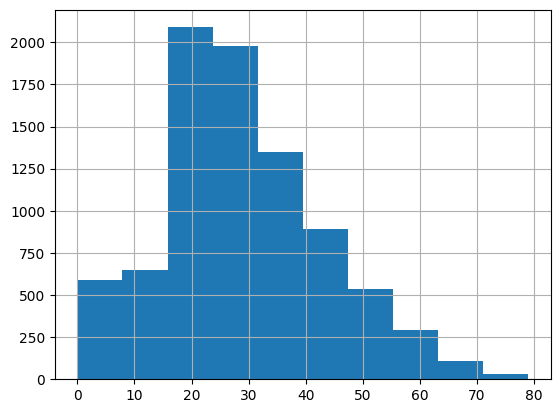

In [526]:
train_df[COLUMN_NAME].hist()

<Axes: >

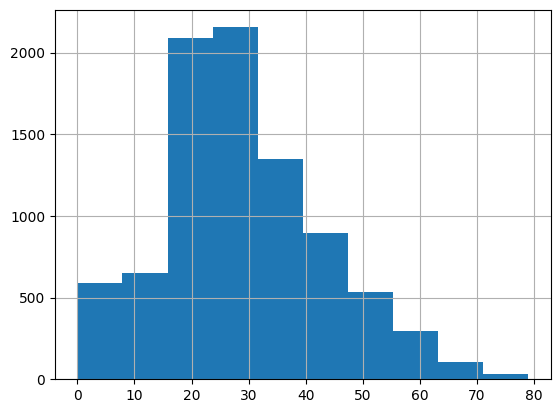

In [527]:
train_df[COLUMN_NAME] = impute_data(train_df[[COLUMN_NAME]])
test_df[COLUMN_NAME] = impute_data(test_df[[COLUMN_NAME]])

train_df[COLUMN_NAME].hist()

**VIP**

In [528]:
COLUMN_NAME = "VIP"
train_df[COLUMN_NAME].value_counts()

VIP
False    8291
True      199
Name: count, dtype: int64

In [529]:
train_df[COLUMN_NAME] = impute_data(
    train_df[[COLUMN_NAME]], strategy="constant", fill_value=False
)
test_df[COLUMN_NAME] = impute_data(
    test_df[[COLUMN_NAME]], strategy="constant", fill_value=False
)

train_df[COLUMN_NAME].value_counts()

VIP
False    8494
True      199
Name: count, dtype: int64

**Amount Values**

In [530]:
COLUMNS = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
train_df[COLUMNS].describe()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,224.687617,458.077203,173.729169,311.138778,304.854791
std,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,47.000000,76.000000,27.000000,59.000000,46.000000
max,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [531]:
train_df[COLUMNS] = impute_data(train_df[COLUMNS], strategy="mean", fill_value=False)
test_df[COLUMNS] = impute_data(test_df[COLUMNS], strategy="mean", fill_value=False)

train_df[COLUMNS].describe()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,224.687617,458.077203,173.729169,311.138778,304.854791
std,659.739364,1594.434978,597.417440,1124.675871,1133.259049
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,78.000000,118.000000,45.000000,89.000000,71.000000
max,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [532]:
train_df.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

# Feature Enginner

In [533]:
def feature_enginner(df: pd.DataFrame) -> pd.DataFrame:

    spending_columns = [
        "RoomService",
        "FoodCourt",
        "ShoppingMall",
        "Spa",
        "VRDeck",
    ]
    age_bins = [0, 18, 35, 50, np.inf]
    age_labels = ["CHILD", "YOUNG", "ADULT", "OLD"]
    cabin_split = df["Cabin"].str.split("/", expand=True)

    df["TotalAmountSpent"] = df[spending_columns].sum(axis=1)
    df["AgeGroup"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels, right=False)
    df["Deck"] = cabin_split[0]
    df["Side"] = cabin_split[2]
    df[["GroupNumber", "GroupPeopleNumber"]] = df["PassengerId"].str.split(
        "_", expand=True
    )
    df["GroupSize"] = df.groupby("GroupNumber")["GroupNumber"].transform("size")

    df.drop(
        columns=[
            "Cabin",
            "GroupNumber",
            "Name",
            "Age",
            "GroupPeopleNumber",
        ]
        + spending_columns,
        inplace=True,
    )

    return df


train_df = feature_enginner(train_df)
test_df = feature_enginner(test_df)

# Preprocessing Data

In [534]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,VIP,Transported,TotalAmountSpent,AgeGroup,Deck,Side,GroupSize
0,0001_01,Europa,False,TRAPPIST-1e,False,False,0.0,ADULT,B,P,1
1,0002_01,Earth,False,TRAPPIST-1e,False,True,736.0,YOUNG,F,S,1
2,0003_01,Europa,False,TRAPPIST-1e,True,False,10383.0,OLD,A,S,2
3,0003_02,Europa,False,TRAPPIST-1e,False,False,5176.0,YOUNG,A,S,2
4,0004_01,Earth,False,TRAPPIST-1e,False,True,1091.0,CHILD,F,S,1


In [535]:
cat_columns = [
    "HomePlanet",
    "Destination",
    "AgeGroup",
    "Deck",
    "Side",
]

num_columns = [
    "TotalAmountSpent",
    "GroupSize",
]

bool_columns = [
    "VIP",
    "CryoSleep",
]


def preprocessing_data(df: pd.DataFrame) -> pd.DataFrame:

    df = df.copy()

    for column in num_columns:
        df[column] = StandardScaler().fit_transform(df[[column]])
        df[column] = df[column].astype("float32")

    for column in bool_columns:
        df[column] = df[column].astype("bool")

    df = pd.get_dummies(df, columns=cat_columns, drop_first=True)

    return df


train_df = preprocessing_data(train_df)
test_df = preprocessing_data(test_df)

In [ ]:
train_df.head()

,PassengerId,CryoSleep,VIP,TotalAmountSpent,GroupSize,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,AgeGroup_YOUNG,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_Z,Side_S,Side_Z
0,0013_01,True,False,-0.515058,-0.648973,False,False,False,True,True,...,False,False,False,False,False,True,False,False,True,False
1,0018_01,False,False,0.491036,-0.648973,False,False,False,True,True,...,False,False,False,False,True,False,False,False,True,False
2,0019_01,True,False,-0.515058,-0.648973,True,False,False,False,True,...,False,True,False,False,False,False,False,False,True,False
3,0021_01,False,False,2.120256,-0.648973,True,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False
4,0023_01,False,False,-0.285916,-0.648973,False,False,False,True,True,...,False,False,False,False,True,False,False,False,True,False


<Axes: >

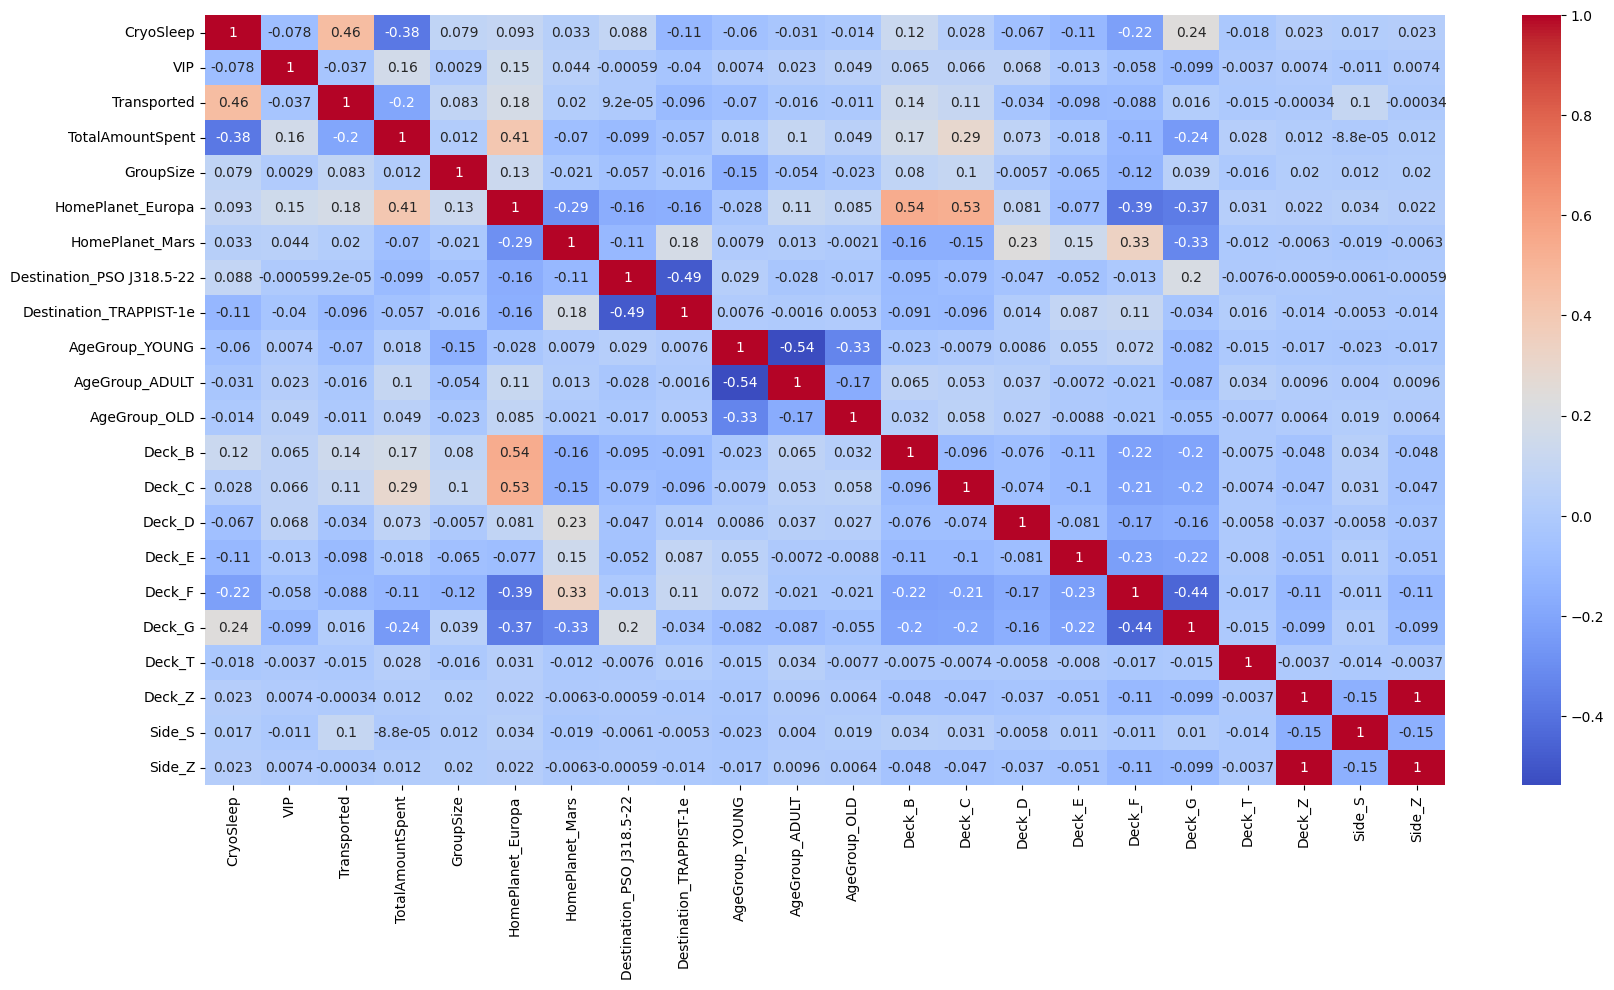

In [537]:
corr_matrix = train_df.drop('PassengerId', axis=1).corr()

plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

# Train and select model

In [538]:
X_train, y_train = train_df.drop(columns=["Transported", 'PassengerId']), train_df["Transported"]

In [539]:
grid_rf = {"n_estimators": [100, 200, 300], "max_depth": [5, 10, 15]}

grid_lr = {
    "C": [0.1, 1, 10],
    "max_iter": [100, 200, 300],
}

grid_xgb = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 10, 15],
}

params = {
    "RandomForest": grid_rf,
    "LogisticRegression": grid_lr,
    "XGBoost": grid_xgb,
}

models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
}

best_models = {}
for model_name, model in models.items():

    grid = GridSearchCV(model, params[model_name], cv=5, n_jobs=-1)
    grid.fit(X_train, y_train)
    best_models[model_name] = grid.best_estimator_

    y_pred = best_models[model_name].predict(X_train)
    print(f"Model: {model_name}")
    print(f"Score: {grid.best_score_}" )
    print(classification_report(y_train, y_pred))

Model: RandomForest
Score: 0.7454302599737558
              precision    recall  f1-score   support

       False       0.74      0.87      0.80      4315
        True       0.84      0.70      0.76      4378

    accuracy                           0.78      8693
   macro avg       0.79      0.78      0.78      8693
weighted avg       0.79      0.78      0.78      8693

Model: LogisticRegression
Score: 0.7279446476322318
              precision    recall  f1-score   support

       False       0.69      0.82      0.75      4315
        True       0.78      0.65      0.71      4378

    accuracy                           0.73      8693
   macro avg       0.74      0.73      0.73      8693
weighted avg       0.74      0.73      0.73      8693

Model: XGBoost
Score: 0.7409419457897777
              precision    recall  f1-score   support

       False       0.77      0.87      0.82      4315
        True       0.85      0.74      0.79      4378

    accuracy                           0.81

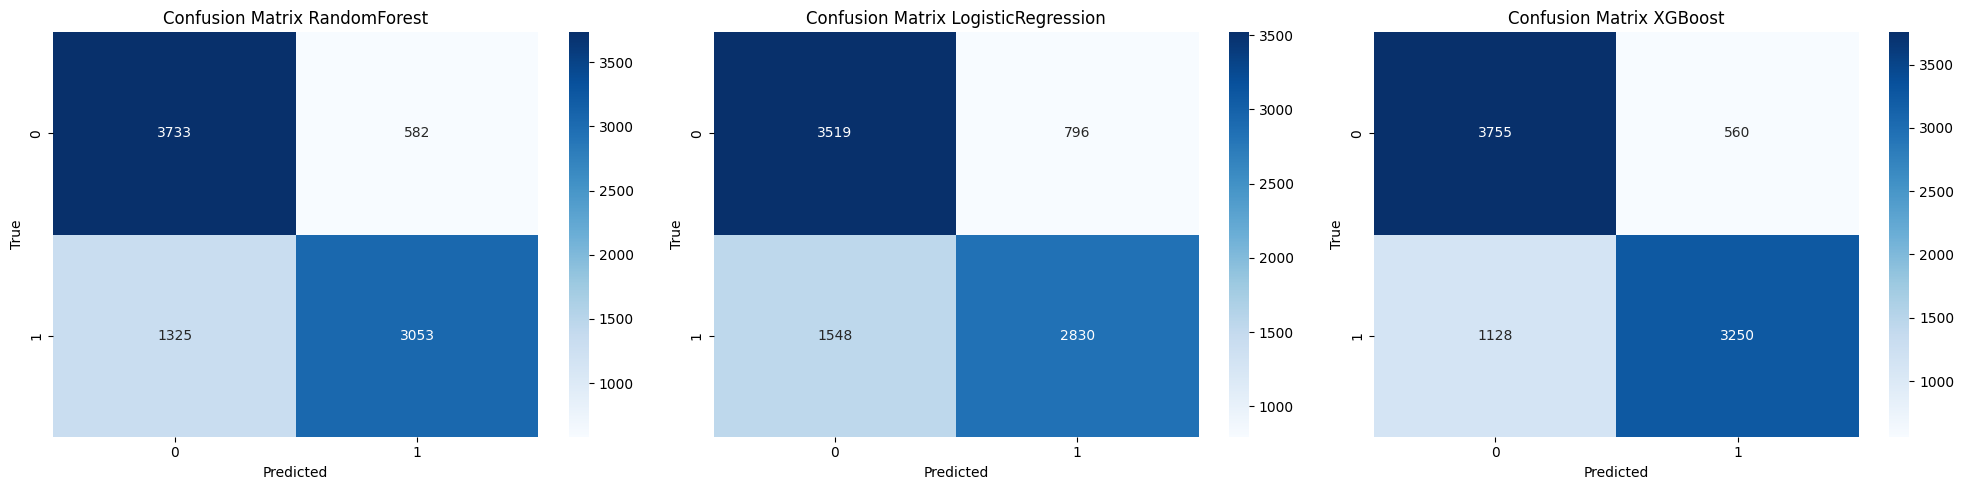

In [540]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for ax, (name, model) in zip(axes, best_models.items()):
    
    y_pred = model.predict(X_train)
    cm = confusion_matrix(y_train, y_pred)

    sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="d")
    ax.set_title(f"Confusion Matrix {name}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")

plt.tight_layout()
plt.show()

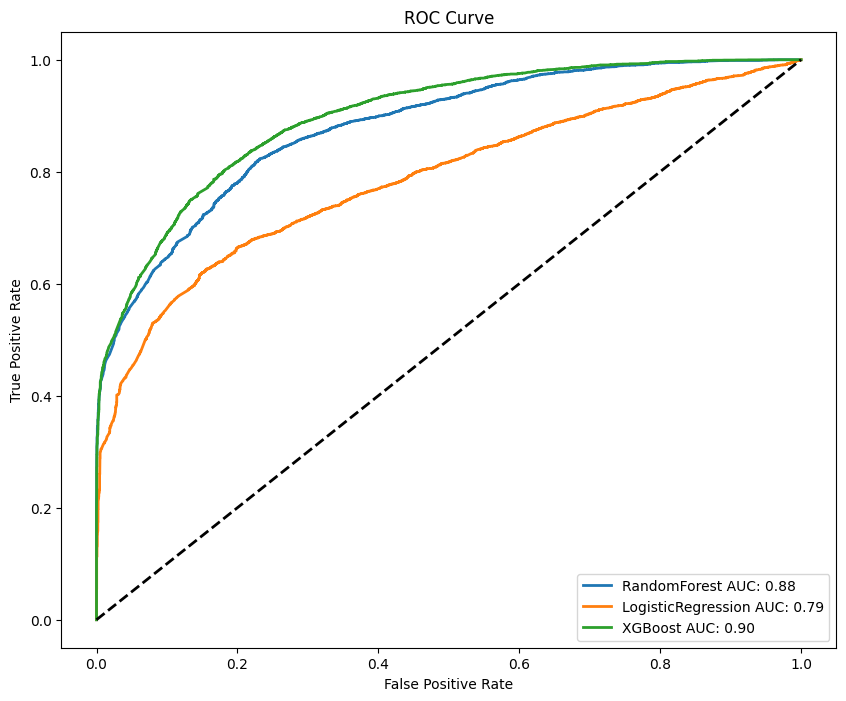

In [541]:
plt.figure(figsize=(10, 8))

for name, model in best_models.items():

    if hasattr(model, "predict_proba"):
        y_pred = model.predict_proba(X_train)[:, 1]
    else:
        y_pred = model.decision_function(X_train)

    fpr, tpr, _ = roc_curve(y_train, y_pred)
    auc_score = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f"{name} AUC: {auc_score:.2f}")

plt.plot([0, 1], [0, 1], "--k", lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [548]:
best_model = best_models["XGBoost"]

X_test = test_df.drop(columns=["PassengerId", "Transported"])

test_df["Transported"] = best_model.predict(X_test)
test_df["Transported"] = test_df['Transported'].map({1: True, 0: False})
test_df[["PassengerId", "Transported"]].to_csv("../dataset/spaceship-titanic/submission.csv", index=False)